In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import seaborn as sns

In [3]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [186]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
# Load Dataset
df = pd.read_csv("data/emotion_dataset_raw.csv")

In [57]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [58]:
# Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

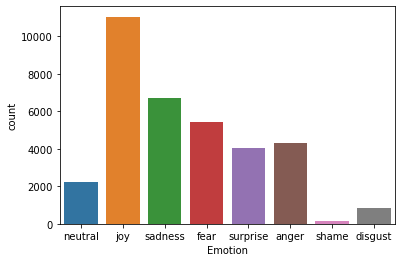

In [59]:
# Plot
sns.countplot(x='Emotion',data=df)

In [60]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [61]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [62]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [170]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [171]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [172]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [173]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [196]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [197]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\bhagw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [198]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

0.6200421536692853
===Classification Report===
              precision    recall  f1-score   support

       anger       0.63      0.55      0.59      1283
     disgust       0.62      0.18      0.28       292
        fear       0.74      0.65      0.69      1645
         joy       0.62      0.75      0.67      3311
     neutral       0.59      0.73      0.65       675
     sadness       0.58      0.57      0.57      2015
       shame       0.82      0.78      0.80        36
    surprise       0.55      0.43      0.48      1181

    accuracy                           0.62     10438
   macro avg       0.64      0.58      0.59     10438
weighted avg       0.62      0.62      0.61     10438

===Confusion Matrix===


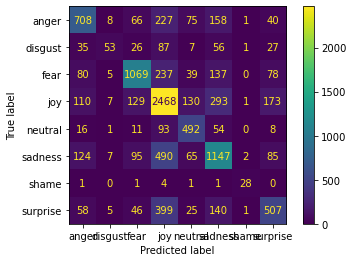

In [200]:
# Check Accuracy
print(pipe_lr.score(x_test,y_test))
prediction=pipe_lr.predict(x_test)
print("===Classification Report===")
print(classification_report(y_test,prediction))
print("===Confusion Matrix===")
#print(confusion_matrix(y_test,prediction))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe_lr, x_test, y_test)

In [191]:
# Make A Prediction
#ex1 = "This bus smell like straight FISH" #disgust
#ex1="i was robbed by a man" #sadness
#ex1="get the hell out" #anger
#ex1="Against the assault of laughter nothing can stands" #fear
#ex1="Its great!" #joy
#ex1="its ok" #neutral
ex1="Bob became embarrassed at his own effusiveness" #shame
#ex1="what a pleasant surprise" #surprise

In [192]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [193]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.16542891, 0.02887589, 0.12536057, 0.21052958, 0.13700307,
        0.06992831, 0.16752759, 0.09534608]])

In [194]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)